In [1]:
# Import packages to use
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'errorbar.capsize': 2})

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
# Define the file to explore
file='resumenLF1.csv'
N=100
s=1.0
# Import the data file
df=pd.read_csv(file, engine='python')

In [14]:
df['nu-teo']=np.divide(-1.0,1.0+df['beta'])

In [15]:
df

,beta,dt,Nsimstotal,nu,nu_err,const,const_err,nu-teo
0,0.001,1.000000e-10,1500,-0.490451,0.082322,-3.154869,1.156023,-0.999001
1,0.010,1.000000e-09,1250,-0.485498,0.065444,-1.970426,0.821465,-0.990099
2,0.100,1.000000e-08,900,-0.485017,0.067570,-0.803894,0.677080,-0.909091
3,0.200,1.000000e-08,1000,-0.479255,0.057062,-0.381172,0.566388,-0.833333
4,0.300,1.000000e-08,1198,-0.482596,0.061168,-0.157709,0.553766,-0.769231
5,0.400,5.000000e-08,994,-0.477278,0.072947,0.060799,0.581346,-0.714286
6,0.500,5.000000e-08,1057,-0.477551,0.083842,0.266589,0.577550,-0.666667
7,0.600,5.000000e-08,1100,-0.469024,0.055713,0.434965,0.466835,-0.625000
8,0.700,5.000000e-08,1300,-0.450697,0.055416,0.649220,0.440183,-0.588235
9,0.800,1.000000e-07,1250,-0.436309,0.045114,0.843531,0.384334,-0.555556


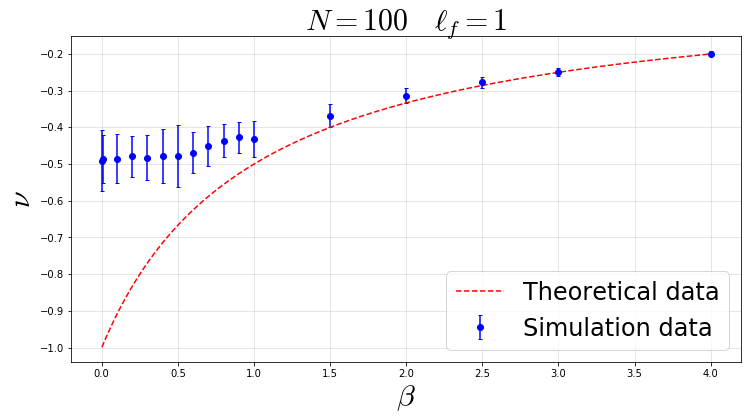

In [17]:
fig,ax=plt.subplots(figsize=(12,6))

ax.errorbar(df['beta'],df['nu'],yerr=df['nu_err'],
            fmt='o',label='Simulation data',color='blue')

betaplot=np.linspace(min(df['beta']),max(df['beta']),1000)
nuplot=np.divide(-1.0,1.0+betaplot)

ax.plot(betaplot,nuplot,label='Theoretical data',
        color='red',linestyle='--')

ax.set_xlabel(r'$\beta$',fontsize=30)
ax.set_ylabel(r'$\nu$',fontsize=30)
ax.set_title(r'$N=%i \quad \ell_f=%g$'%(N,s),fontsize=30)

plt.grid(alpha=0.4)
plt.legend(fontsize=24)
plt.show()
plt.close()

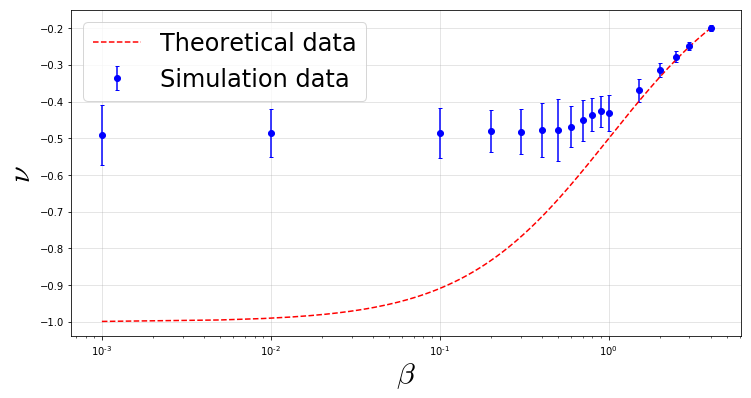

In [12]:
fig,ax=plt.subplots(figsize=(12,6))

ax.errorbar(df['beta'],df['nu'],yerr=df['nu_err'],
            fmt='o',label='Simulation data',color='blue')

betaplot=np.linspace(min(df['beta']),max(df['beta']),1000)
nuplot=np.divide(-1.0,1.0+betaplot)
ax.plot(betaplot,nuplot,label='Theoretical data',
        color='red',linestyle='--')

ax.set_xscale('log')
ax.set_xlabel(r'$\beta$',fontsize=30)
ax.set_ylabel(r'$\nu$',fontsize=30)

plt.grid(alpha=0.4)
plt.legend(fontsize=24)
plt.show()
plt.close()

In [22]:
# Perform fit of the form y=ax+b
# Define function to calculate a,b,err_a,err_b
def regression(x,y,err_y):
    n=len(x)
    xiyi=np.sum(np.multiply(x,y))
    xi=np.sum(x)
    yj=np.sum(y)
    xi2=np.sum(np.square(x))
    xidyi=np.sum(np.multiply(x,err_y))
    dyj=np.sum(err_y)
    den=n*xi2-xi**2
    
    a=(n*xiyi-xi*yj)/den
    b=(xi2*yj-xi*xiyi)/den
    err_a=(n*xidyi-xi*dyj)/den
    err_b=(xi2*dyj-xi*xidyi)/den
    
    return a,b,err_a,err_b

In [51]:
df_cut=df[df['beta']>1.0]

xreg=1/(1+df_cut['beta'])
yreg=df_cut['const']
y_err=df_cut['const_err']

a,b,err_a,err_b=regression(xreg,yreg,y_err)
print('a: %f'%a)
print('b: %f'%b)
print('err_a: %f'%err_a)
print('err_b: %f'%err_b)

a: -10.219802
b: 5.911601
err_a: 0.922415
err_b: -0.133972


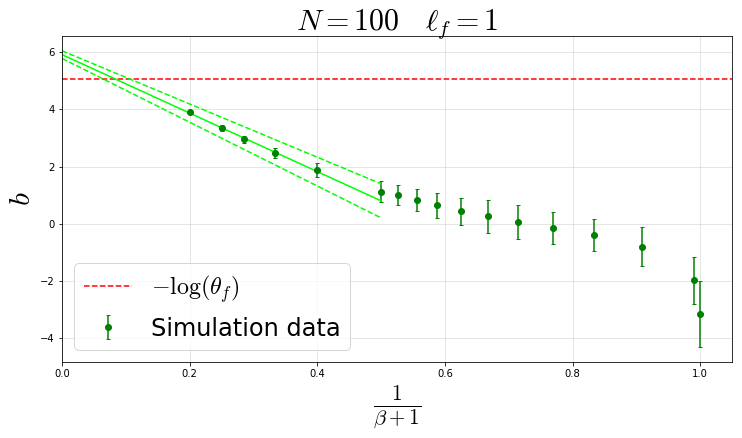

In [59]:
fig,ax=plt.subplots(figsize=(12,6))

ax.errorbar(1/(1+df['beta']),df['const'],yerr=df['const_err'],
           fmt='o',label='Simulation data',color='green')

plt.axhline(-np.log(2*np.pi*1.0/(100*10)),label=r'$-\log(\theta_f)$',
            color='red',linestyle='--')

xplot=np.linspace(0,0.5)
yplot1=a*xplot+b
yplot2=(a+err_a)*xplot+(b-err_b)
yplot3=(a-err_a)*xplot+(b+err_b)

plt.plot(xplot,yplot1,color='lime')
plt.plot(xplot,yplot2,color='lime',linestyle='--')
plt.plot(xplot,yplot3,color='lime',linestyle='--')

ax.set_xlabel(r'$\frac{1}{\beta+1}$',fontsize=30)
ax.set_ylabel(r'$b$',fontsize=30)
ax.set_title(r'$N=%i \quad \ell_f=%g$'%(N,s),fontsize=30)

ax.set_xlim(0)
plt.grid(alpha=0.4)
plt.legend(fontsize=24)
plt.show()
plt.close()